# Chapter 5 - Just IQ

## Setup

Run Python file to import libraries and custom functions

In [1]:
%run libraries.py

/Users/joefarrington/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Set paths for data and results

In [2]:
data_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Data for import/'
results_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Results/Ch5IQonly/'

Define a string to be added to the name of all saved results from this notebook

In [3]:
nbname = 'Ch5IQonly'

Import the syndromic IQ subset, taking only IQ as a feature.

In [19]:
X_all = np.array(pd.read_csv(data_path+'X_synd_IQ.csv', index_col=0)['IQ']).reshape(-1,1)
y_all = np.array(pd.read_csv(data_path+'y_synd_IQ.csv', index_col=0, header=None)).reshape(-1,)

Define an sklearn scorer object to calculate the Matthews Correlation Coefficient (MCC)

In [5]:
mcc_scorer = make_scorer(matthews_corrcoef)

Create a list that contains the labels, to use for labelling the axes of figures.

In [20]:
B_labels = np.unique(y_all)
B_labels[1] = 'DS'
B_labels

array(['22q11DS', 'DS', 'FXS-F', 'FXS-M', 'NF1', 'PW-UPD', 'PW-del',
       'SMC15', 'TSC', 'XXY'], dtype=object)

## Model 1: OvO SVM with RBF kernel

Define the number of train/test splits and the number of folds for cross-validation

In [4]:
n_repeats = 50
n_folds = 10

Define the model

In [23]:
svc_rbf = SVC(decision_function_shape='ovo', kernel='rbf')
steps_rbf = [('scaler', StandardScaler()),
     ('model',svc_rbf)]
pipeline_rbf = Pipeline(steps_rbf)

Define the parameters for the grid search

In [24]:
rbf_C_range = np.logspace(start=-5, stop=15, num=21, base=2)
rbf_gamma_range = np.logspace(start=-15, stop=3, num=19, base=2)
rbf_parameters = dict(model__gamma=rbf_gamma_range, model__C=rbf_C_range)

Run the evaluation procedure

In [25]:
svm_rbf_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rbf_parameters, pipeline_rbf, mcc_scorer, verbose=1)

Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3206 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 3672 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.2min finished


Run 0 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3156 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 3613 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3963 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.5min finished


Run 1 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 3569 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 2 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3191 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 3700 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished


Run 3 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 3579 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 4 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3313 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 3732 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.5min finished


Run 5 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 3441 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 6 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 3413 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 3729 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 7 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3244 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 3675 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 8 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3328 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 3806 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed: 42.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 9 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2509 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 3374 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 3752 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 10 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 3004 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 3662 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  4.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 11 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3004 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 3641 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 12 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3227 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 3644 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 13 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2995 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 3598 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 14 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3244 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 3634 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.5min finished


Run 15 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3146 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 3629 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 16 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 3492 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 3898 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 17 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3206 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 3669 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 18 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3156 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 3616 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.0min finished


Run 19 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3211 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 3587 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3937 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.4min finished


Run 20 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3220 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 3660 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.7min finished


Run 21 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 3219 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 3633 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 22 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3219 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 3642 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.4min finished


Run 23 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 3556 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 3906 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 24 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3356 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 3773 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  2.9min finished


Run 25 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2995 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 3634 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.2min finished


Run 26 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2995 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 3617 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3970 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 27 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3222 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 3640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.3min finished


Run 28 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3430 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 3851 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  2.8min finished


Run 29 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3356 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 3766 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 30 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3399 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3741 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 31 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3228 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 3809 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  2.8min finished


Run 32 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3291 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 3646 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 33 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 3239 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 3694 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.8min finished


Run 34 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3436 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 3854 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  2.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 35 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3246 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 3628 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 36 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3318 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 3713 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 37 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3211 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 3657 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 38 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 3794 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3975 out of 3990 | elapsed:  2.4min remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 39 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2986 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 3666 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 40 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 3698 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 41 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3211 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 3610 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 42 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3189 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 3622 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.7min finished


Run 43 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3237 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 3707 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 44 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 3428 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.4min finished


Run 45 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3345 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 3819 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 46 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2995 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 3610 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.1min finished


Run 47 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3227 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 3788 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 48 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3151 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 3491 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 3841 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:  3.9min finished


Run 49 completed
Mean test accuracy: 0.25643564356435644
Std dev test accuracy: 0.03212867473185733
Mean test MCC: 0.15911125413663493
Std dev test MCC: 0.043016916721630334


Save the results

In [26]:
pickle.dump(svm_rbf_dict, open(results_path+f"svm_rbf_dict_{nbname}.p", "wb" ))

Load the results

In [5]:
svm_rbf_dict = pickle.load(open(results_path+f"svm_rbf_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

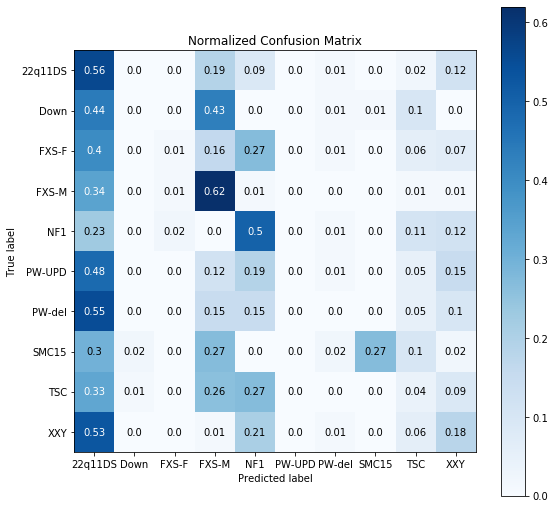

In [28]:
plot_confusion_matrix(svm_rbf_dict["cmdf"]["label"],svm_rbf_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [6]:
print_test_res(svm_rbf_dict, n_repeats)

Mean test accuracy: 0.25643564356435644
Std dev test accuracy: 0.03212867473185733
Mean test MCC: 0.15911125413663493
Std dev test MCC: 0.043016916721630334


## Model 2: OvO SVM with linear kernel

Define the number of train/test splits and the number of folds for cross-validation

In [29]:
n_repeats = 50
n_folds = 10

Define the model

In [30]:
svc_lin = SVC(decision_function_shape='ovo', kernel='linear')
steps_lin = [('scaler', StandardScaler()),
     ('model',svc_lin)]
pipeline_lin = Pipeline(steps_lin)

Define the parameters for the grid search

In [31]:
lin_C_range = np.logspace(start=-10, stop=10, num=21, base=2)
lin_parameters = dict(model__C=lin_C_range)

Run the evaluation procedure

In [32]:
svm_lin_dict = repeated_training(X_all, y_all, n_repeats, n_folds, lin_parameters, 
                                 pipeline_lin, mcc_scorer, verbose=1)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 0 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 1 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 2 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 3 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 4 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 5 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 6 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 7 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 8 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 9 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 10 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 11 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 12 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 13 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 14 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 15 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 16 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 17 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 18 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 19 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 20 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 21 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 22 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 23 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 24 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 25 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 26 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 27 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 28 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 29 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 30 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 31 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 32 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 33 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 34 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 35 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 36 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 37 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 38 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 39 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 40 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 41 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 42 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 43 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 44 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 45 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 46 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 47 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 48 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Run 49 completed
Mean test accuracy: 0.22415841584158414
Std dev test accuracy: 0.028747674366668523
Mean test MCC: 0.10334290727231002
Std dev test MCC: 0.037955849608787194


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.5s finished


Save the results

In [33]:
pickle.dump(svm_lin_dict, open(results_path+f"svm_lin_dict_{nbname}.p", "wb" ))

Load the results

In [9]:
svm_lin_dict = pickle.load(open(results_path+f"svm_lin_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

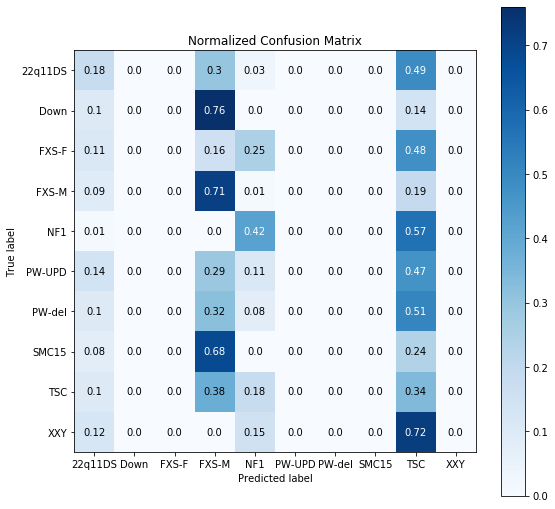

In [35]:
plot_confusion_matrix(svm_lin_dict["cmdf"]["label"],svm_lin_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [10]:
print_test_res(svm_lin_dict, n_repeats)

Mean test accuracy: 0.22415841584158414
Std dev test accuracy: 0.028747674366668523
Mean test MCC: 0.10334290727231002
Std dev test MCC: 0.037955849608787194


## Model 3: Naive Bayes (learn prior)

See '<b>Naive Bayes in R.ipynb</b>'

Load in the results

In [10]:
NB_noprior = pd.read_csv(results_path+'IQonly_noprior_allpreds.csv', index_col=0)

Plot a normalized confusion matrix

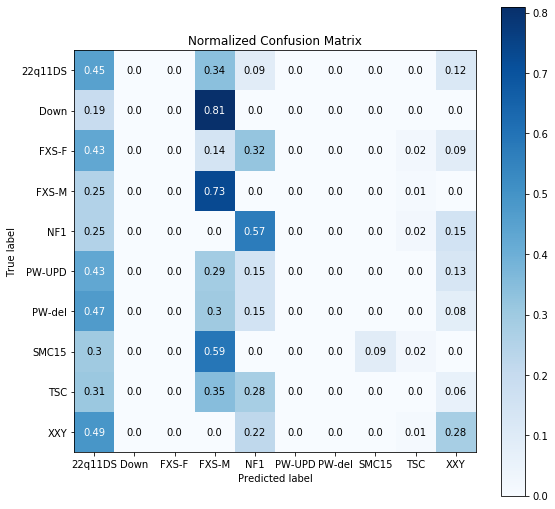

In [11]:
plot_confusion_matrix(NB_noprior['ytrue'],NB_noprior['ypred'], figsize=(9,9), normalize=True);

## Model 4: Naive Bayes (uniform prior) 

See '<b>Naive Bayes in R.ipynb</b>'

Load in the results

In [12]:
NB_uniprior = pd.read_csv(results_path+'IQonly_uniprior_allpreds.csv', index_col=0)

Plot a normalized confusion matrix

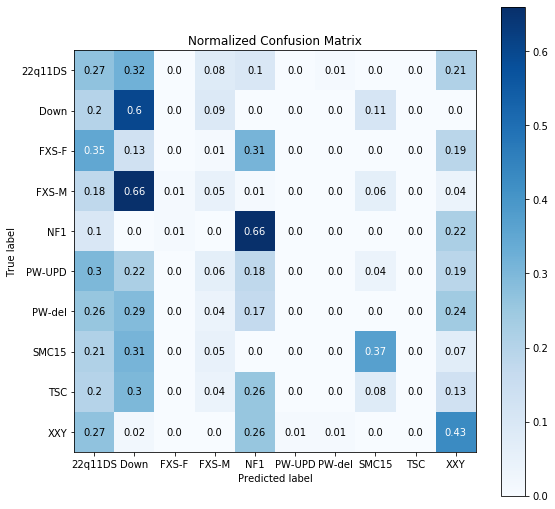

In [13]:
plot_confusion_matrix(NB_uniprior['ytrue'],NB_uniprior['ypred'], figsize=(9,9), normalize=True);

In [7]:
import pickle

class MacOSFile(object):

    def __init__(self, f):
        self.f = f

    def __getattr__(self, item):
        return getattr(self.f, item)

    def read(self, n):
        # print("reading total_bytes=%s" % n, flush=True)
        if n >= (1 << 31):
            buffer = bytearray(n)
            idx = 0
            while idx < n:
                batch_size = min(n - idx, 1 << 31 - 1)
                # print("reading bytes [%s,%s)..." % (idx, idx + batch_size), end="", flush=True)
                buffer[idx:idx + batch_size] = self.f.read(batch_size)
                # print("done.", flush=True)
                idx += batch_size
            return buffer
        return self.f.read(n)

    def write(self, buffer):
        n = len(buffer)
        print("writing total_bytes=%s..." % n, flush=True)
        idx = 0
        while idx < n:
            batch_size = min(n - idx, 1 << 31 - 1)
            print("writing bytes [%s, %s)... " % (idx, idx + batch_size), end="", flush=True)
            self.f.write(buffer[idx:idx + batch_size])
            print("done.", flush=True)
            idx += batch_size


def pickle_dump(obj, file_path):
    with open(file_path, "wb") as f:
        return pickle.dump(obj, MacOSFile(f), protocol=pickle.HIGHEST_PROTOCOL)


def pickle_load(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(MacOSFile(f))

## Model 5: Standard Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [41]:
n_repeats = 50
n_folds = 10

Define the model

In [42]:
rfc_naive = RandomForestClassifier()

Define the parameters for the grid search

In [44]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [1],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [45]:
rfc_naive_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_naive, mcc_scorer, verbose=1)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.9s finished


Run 0 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.2s finished


Run 1 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.5s finished


Run 2 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.4s finished


Run 3 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.4s finished


Run 4 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.2s finished


Run 5 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.4s finished


Run 6 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.0s finished


Run 7 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.0s finished


Run 8 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.0s finished


Run 9 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.2s finished


Run 10 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.4s finished


Run 11 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.5s finished


Run 12 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.7s finished


Run 13 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.2s finished


Run 14 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.9s finished


Run 15 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.1s finished


Run 16 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.7s finished


Run 17 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.3s finished


Run 18 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.0s finished


Run 19 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.3s finished


Run 20 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.7s finished


Run 21 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.6s finished


Run 22 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.5s finished


Run 23 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.0s finished


Run 24 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.7s finished


Run 25 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.0s finished


Run 26 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.8s finished


Run 27 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.8s finished


Run 28 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.0s finished


Run 29 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.6s finished


Run 30 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.5s finished


Run 31 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.5s finished


Run 32 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.1s finished


Run 33 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.4s finished


Run 34 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.5s finished


Run 35 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.6s finished


Run 36 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.8s finished


Run 37 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.3s finished


Run 38 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.7s finished


Run 39 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.7s finished


Run 40 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.3s finished


Run 41 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.3s finished


Run 42 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 43 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.8s finished


Run 44 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.9s finished


Run 45 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.4s finished


Run 46 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.3s finished


Run 47 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.7s finished


Run 48 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.2s finished


Run 49 completed
Mean test accuracy: 0.2493069306930693
Std dev test accuracy: 0.0352947730938214
Mean test MCC: 0.1441414871412903
Std dev test MCC: 0.04118155187217003


Save the results

In [46]:
pickle_dump(rfc_naive_dict, results_path+f"rfc_naive_dict_{nbname}.p")

writing total_bytes=1267316485...
writing bytes [0, 1073741824)... done.
writing bytes [1073741824, 1267316485)... done.


Load the results

In [11]:
rfc_naive_dict = pickle_load(results_path+f"rfc_naive_dict_{nbname}.p")

Plot a normalized confusion matrix

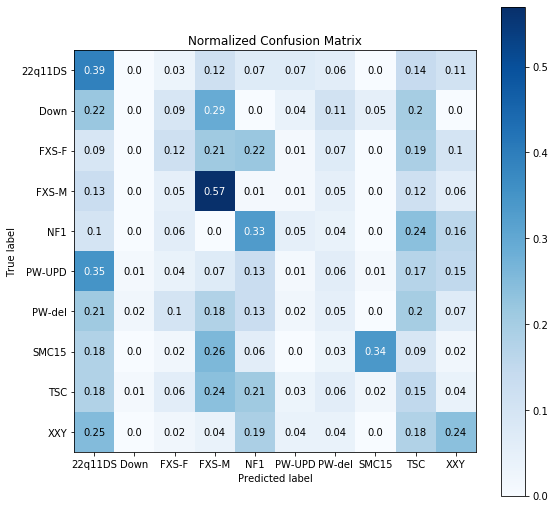

In [49]:
plot_confusion_matrix(rfc_naive_dict["cmdf"]["label"],rfc_naive_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [12]:
print_test_res(rfc_naive_dict, n_repeats)

Mean test accuracy: 0.2493069306930693
Std dev test accuracy: 0.0352947730938214
Mean test MCC: 0.1441414871412903
Std dev test MCC: 0.04118155187217003


## Model 6: Balanced Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [50]:
n_repeats = 50
n_folds = 10

Define the model

In [51]:
rfc_bal = BalancedRandomForestClassifier()

Define the parameters for the grid search

In [52]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [1],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [53]:
rfc_bal_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_bal, mcc_scorer, verbose=1)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Run 0 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Run 1 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


Run 2 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Run 3 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


Run 4 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Run 5 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Run 6 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Run 7 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Run 8 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Run 9 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Run 10 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Run 11 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Run 12 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Run 13 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 14 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 15 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Run 16 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Run 17 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Run 18 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 64.2min finished


Run 19 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Run 20 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 21 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 22 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 23 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 24 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 25 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 26 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 27 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 28 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 29 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 30 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 31 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 32 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 33 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 34 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 35 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 36 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 37 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 38 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 39 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 40 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 41 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Run 42 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 43 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 44 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 45 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 46 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 47 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 48 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Run 49 completed
Mean test accuracy: 0.21405940594059406
Std dev test accuracy: 0.030089237600681343
Mean test MCC: 0.13460448442459275
Std dev test MCC: 0.03279779708041888


Save the results

In [54]:
pickle_dump(rfc_bal_dict, results_path+f"rfc_bal_dict_{nbname}.p")

writing total_bytes=1320583715...
writing bytes [0, 1073741824)... done.
writing bytes [1073741824, 1320583715)... done.


Load the results

In [13]:
rfc_bal_dict = pickle_load(results_path+f"rfc_bal_dict_{nbname}.p")

Plot a normalized confusion matrix

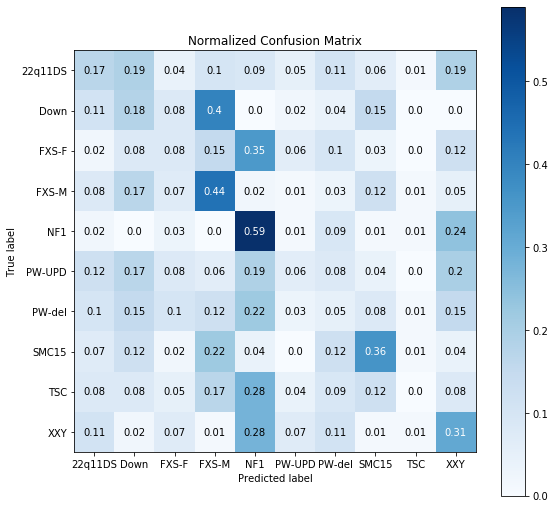

In [56]:
plot_confusion_matrix(rfc_bal_dict["cmdf"]["label"],rfc_bal_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [14]:
print_test_res(rfc_bal_dict, n_repeats)

Mean test accuracy: 0.21405940594059406
Std dev test accuracy: 0.030089237600681343
Mean test MCC: 0.13460448442459275
Std dev test MCC: 0.03279779708041888


## Model 7: Weighted Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [57]:
n_repeats = 50
n_folds = 10

Define the model

In [58]:
rfc_weighted = RandomForestClassifier(class_weight = 'balanced_subsample')

Define the parameters for the grid search

In [59]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [1],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [60]:
rfc_weighted_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_weighted, mcc_scorer, verbose=1)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.0s finished


Run 0 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.6s finished


Run 1 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 2 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.9s finished


Run 3 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 4 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 5 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 6 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 7 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 8 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 9 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 10 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 11 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.4s finished


Run 12 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 13 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 14 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.6s finished


Run 15 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 16 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.6s finished


Run 17 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 18 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.4s finished


Run 19 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 20 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 21 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.6s finished


Run 22 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 23 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 24 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 25 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 26 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 27 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 28 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.4s finished


Run 29 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 30 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.6s finished


Run 31 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


Run 32 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 33 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.4s finished


Run 34 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 35 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.6s finished


Run 36 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.4s finished


Run 37 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 38 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 39 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 40 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 41 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.4s finished


Run 42 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 43 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 44 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 45 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


Run 46 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 47 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


Run 48 completed
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.4s finished


Run 49 completed
Mean test accuracy: 0.18792079207920792
Std dev test accuracy: 0.03605320165632452
Mean test MCC: 0.09878443798193748
Std dev test MCC: 0.03874819253352476


Save the results

In [61]:
pickle_dump(rfc_weighted_dict, results_path+f"rfc_weighted_dict_{nbname}.p")

writing total_bytes=1472005176...
writing bytes [0, 1073741824)... done.
writing bytes [1073741824, 1472005176)... done.


Load the results

In [15]:
rfc_weighted_dict = pickle_load(results_path+f"rfc_weighted_dict_{nbname}.p")

Plot a normalized confusion matrix

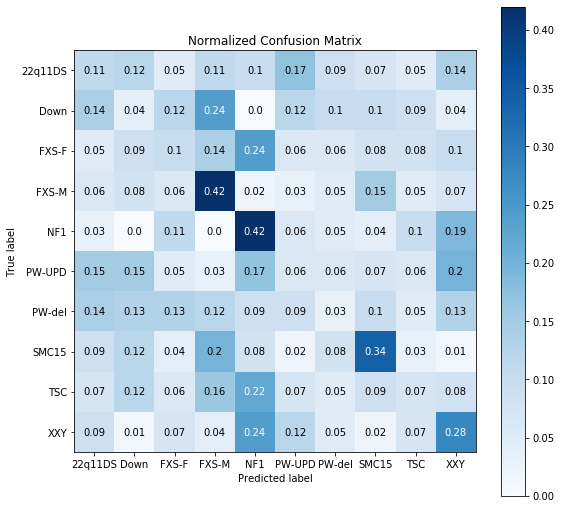

In [63]:
plot_confusion_matrix(rfc_weighted_dict["cmdf"]["label"],rfc_weighted_dict["cmdf"]["pred"], figsize=(9,9), normalize=True);

Print results

In [16]:
print_test_res(rfc_weighted_dict, n_repeats)

Mean test accuracy: 0.18792079207920792
Std dev test accuracy: 0.03605320165632452
Mean test MCC: 0.09878443798193748
Std dev test MCC: 0.03874819253352476


## Plot confusion matrices for the report

Define a path to save the plots

In [5]:
plot_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Plots/Ch5/'

Load in the data

In [16]:
svm_rbf_dict = pickle_load(results_path+f"svm_rbf_dict_{nbname}.p")
NB_uniprior = pd.read_csv(results_path+'IQonly_uniprior_allpreds.csv', index_col=0)
rfc_weighted_dict = pickle_load(results_path+f"rfc_weighted_dict_{nbname}.p")

Plot the figure

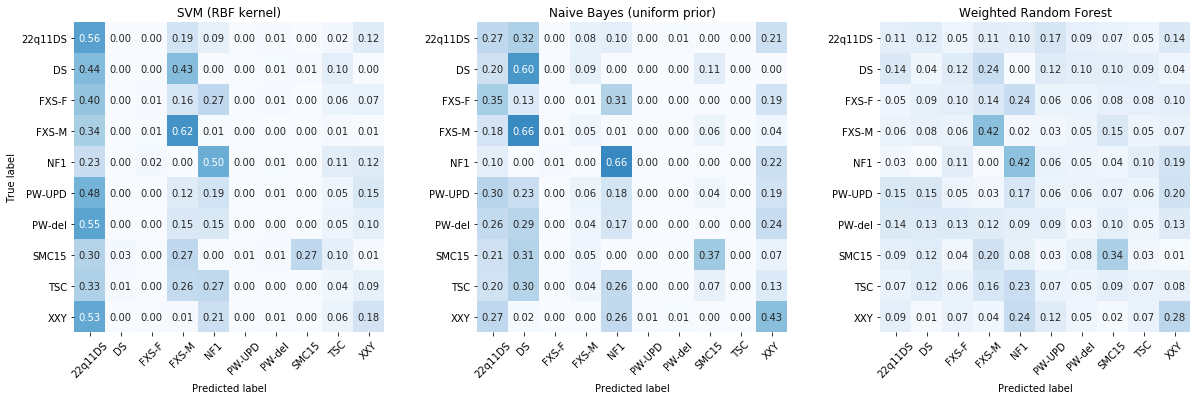

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,6))

plot_normalized_cm(svm_rbf_dict["cmdf"]["label"],svm_rbf_dict["cmdf"]["pred"], B_labels, ax=ax1)
ax1.set_yticklabels(labels = B_labels, rotation=0);
ax1.set_xticklabels(labels = B_labels, rotation=45);
ax1.set_title('SVM (RBF kernel)');
ax1.set_ylabel('True label');
ax1.set_xlabel('Predicted label');

plot_normalized_cm(NB_uniprior['ytrue'],NB_uniprior['ypred'], B_labels, ax=ax2)
ax2.set_yticklabels(labels = B_labels, rotation=0);
ax2.set_xticklabels(labels = B_labels, rotation=45);
ax2.set_title('Naive Bayes (uniform prior)');
ax2.set_xlabel('Predicted label');

plot_normalized_cm(rfc_weighted_dict["cmdf"]["label"],rfc_weighted_dict["cmdf"]["pred"], B_labels, ax=ax3)
ax3.set_yticklabels(labels = B_labels, rotation=0);
ax3.set_xticklabels(labels = B_labels, rotation=45);
ax3.set_title('Weighted Random Forest');
ax3.set_xlabel('Predicted label');

plt.subplots_adjust(wspace=0.3)

plt.savefig(plot_path+'IQonlyCM.png')